![lop](../../images/logo_diive1_128px.png)

<span style='font-size:28px; display:block;'>
<b>
    Calculate time since last occurrence
</b>
    (precipitation & temperature example)
</span>

---
**Notebook version**: `1` (25 Apr 2024)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)  

</br>

# **Description**

- In **Example (1)** the number of records since last recorded precipitation (> 0) are counted, which helps in identifying dry time periods. The name of the precipitation variable is `PREC_TOT_T1_25+20_1`, recorded in `mm` precipitation per half hour.
- In **Example (2)** the number of records since air temperature was <= 0°C are counted. The name of the air temperature variable is `Tair_f`, recorded in `°C` precipitation per half hour.

</br>

# **Imports**

In [1]:
import importlib.metadata
import warnings
from datetime import datetime

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

from diive.configs.exampledata import load_exampledata_parquet
from diive.core.plotting.heatmap_datetime import HeatmapDateTime
from diive.core.plotting.timeseries import TimeSeries
from diive.pkgs.createvar.timesince import TimeSince

warnings.filterwarnings("ignore")
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.83.2


</br>

# **Docstring**

In [2]:
# help(TimeSince)

</br>

# **Load example data**
- Half-hourly precipitation in `mm`
- Half-hourly air temperature in `°C`

In [3]:
df = load_exampledata_parquet()
series_prec = df.loc[(df.index.year == 2022) & (df.index.month == 7), "PREC_TOT_T1_25+20_1"].copy()
series_ta = df.loc[(df.index.year == 2022) & (df.index.month == 3), "Tair_f"].copy()

Loaded .parquet file F:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\configs\exampledata\exampledata_PARQUET_CH-DAV_FP2022.5_2013-2022_ID20230206154316_30MIN.parquet (0.052 seconds). Detected time resolution of <30 * Minutes> / 30min 


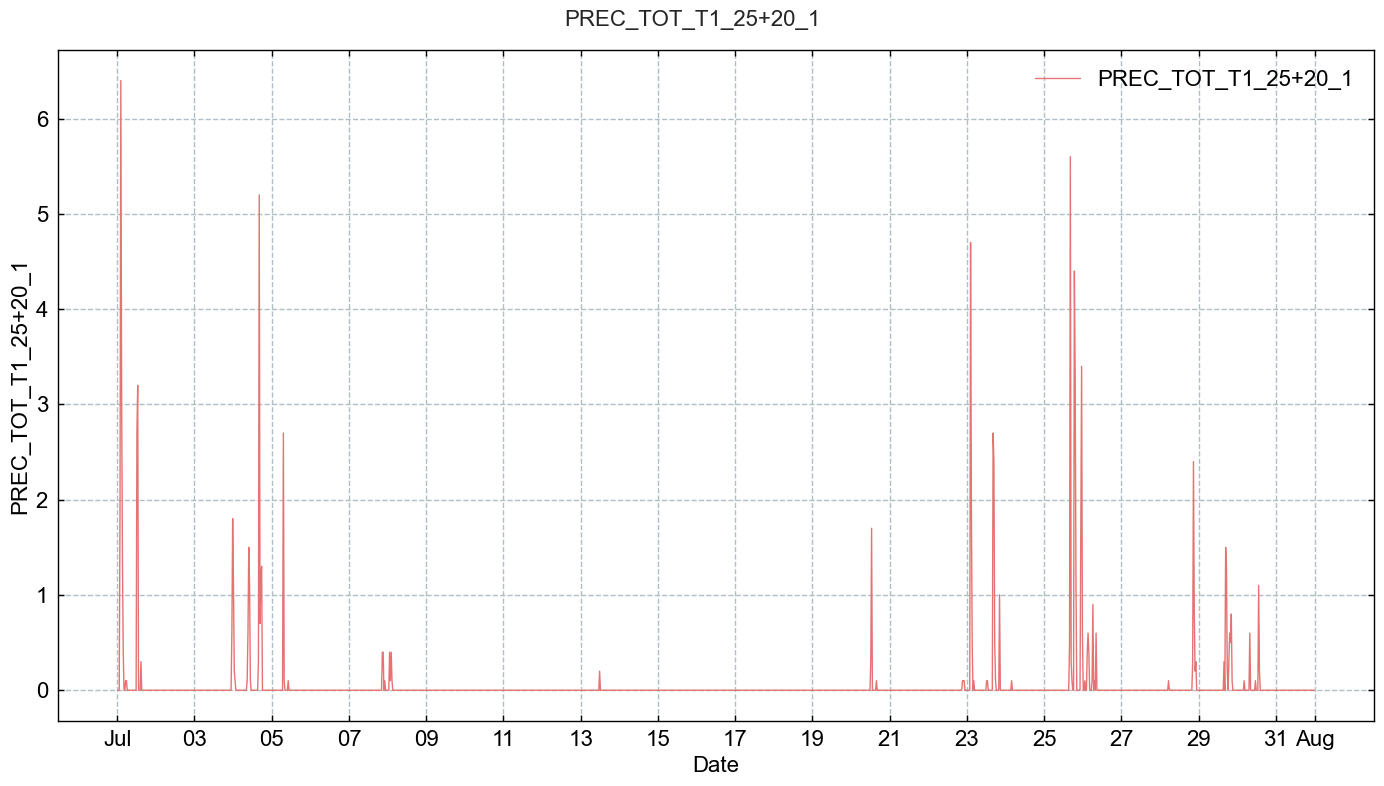

In [5]:
TimeSeries(series_prec).plot()

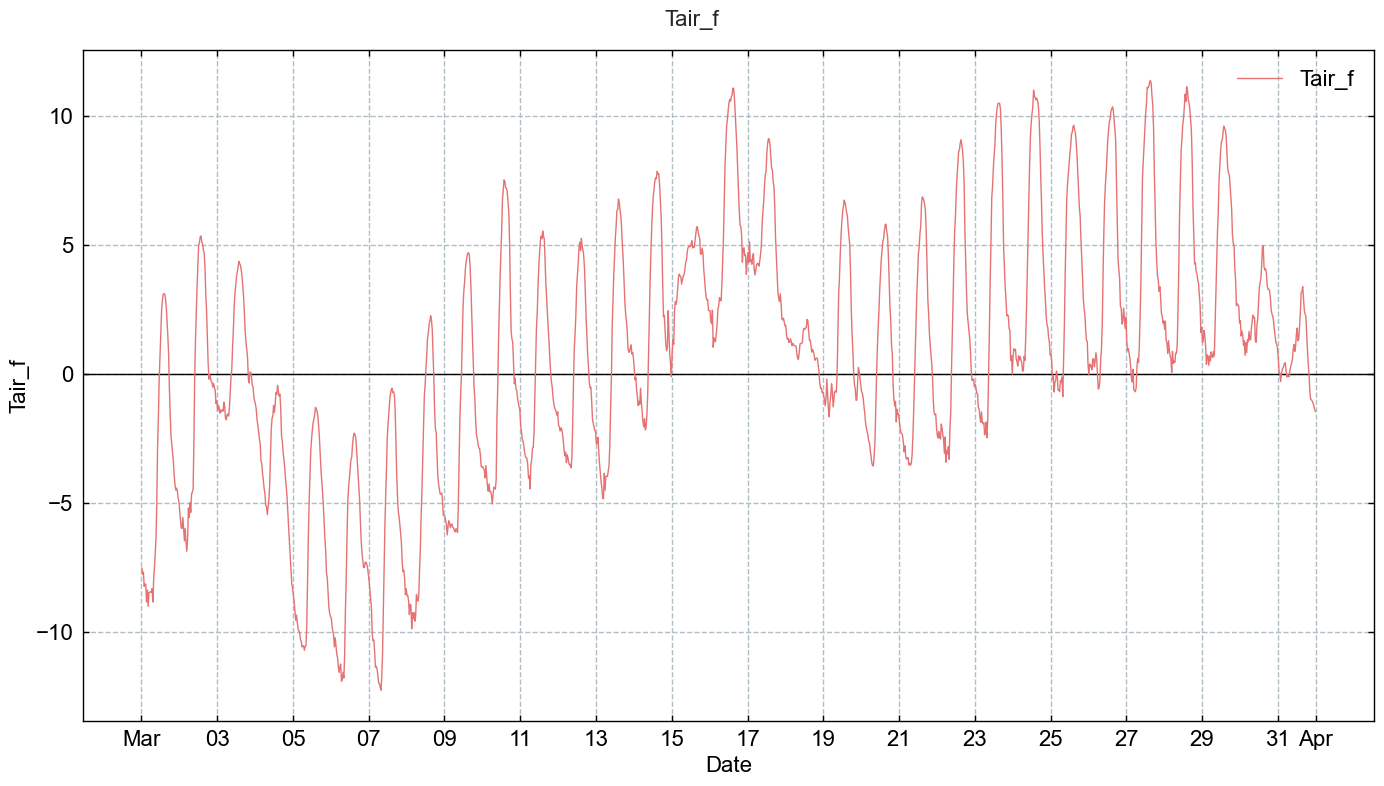

In [6]:
TimeSeries(series_ta).plot()

</br>

# **Example 1: Precipitation**

</br>

## Calculate time since last precipitation
- `lower_lim` is set to `0` and `include_lim` is set to `False` to include all precipitation > `0`
- `include_lim` is set to `False` to make `lower_lim` exclusive, in this example this means that `0` values in precipitation are not counted but only values > `0` (in contrast, `include_lim=True` would include `0` values).

In [7]:
ts_prec = TimeSince(series_prec, lower_lim=0, include_lim=False)
ts_prec.calc()

## Results

The full results comprise the following output variables:
- `PREC_TOT_T1_25+20_1`: original measured precipitation (mm)
- `UPPER_LIMIT`: upper limit from settings
- `LOWER_LIMIT`: lower limit from settings
- `FLAG_IS_OUTSIDE_RANGE`: shows measured is outside specified limits, used to build cumulative sums in `TIMESINCE_PREC_TOT_T1_25+20_1`
- `TIMESINCE_PREC_TOT_T1_25+20_1`: cumulative sums of number of records since last precipitation

In [8]:
ts_prec_full_results = ts_prec.get_full_results()
ts_prec_full_results.head(20)

,PREC_TOT_T1_25+20_1,UPPER_LIMIT,LOWER_LIMIT,FLAG_IS_OUTSIDE_RANGE,TIMESINCE_PREC_TOT_T1_25+20_1
TIMESTAMP_MIDDLE,,,,,
2022-07-01 00:15:00,0.0,6.4,0,1,1
2022-07-01 00:45:00,0.0,6.4,0,1,2
2022-07-01 01:15:00,0.0,6.4,0,1,3
2022-07-01 01:45:00,1.9,6.4,0,0,0
2022-07-01 02:15:00,6.4,6.4,0,1,1
2022-07-01 02:45:00,3.1,6.4,0,0,0
2022-07-01 03:15:00,1.4,6.4,0,0,0
2022-07-01 03:45:00,0.4,6.4,0,0,0
2022-07-01 04:15:00,0.0,6.4,0,1,1


It is also possible to get the `TIMESINCE_` variable directly, without full results:

In [9]:
ts_prec_series = ts_prec.get_timesince()
ts_prec_series

TIMESTAMP_MIDDLE
2022-07-01 00:15:00     1
2022-07-01 00:45:00     2
2022-07-01 01:15:00     3
2022-07-01 01:45:00     0
2022-07-01 02:15:00     1
                       ..
2022-07-31 21:45:00    64
2022-07-31 22:15:00    65
2022-07-31 22:45:00    66
2022-07-31 23:15:00    67
2022-07-31 23:45:00    68
Freq: 30min, Name: TIMESINCE_PREC_TOT_T1_25+20_1, Length: 1488, dtype: int64

</br>

## Plot some variables

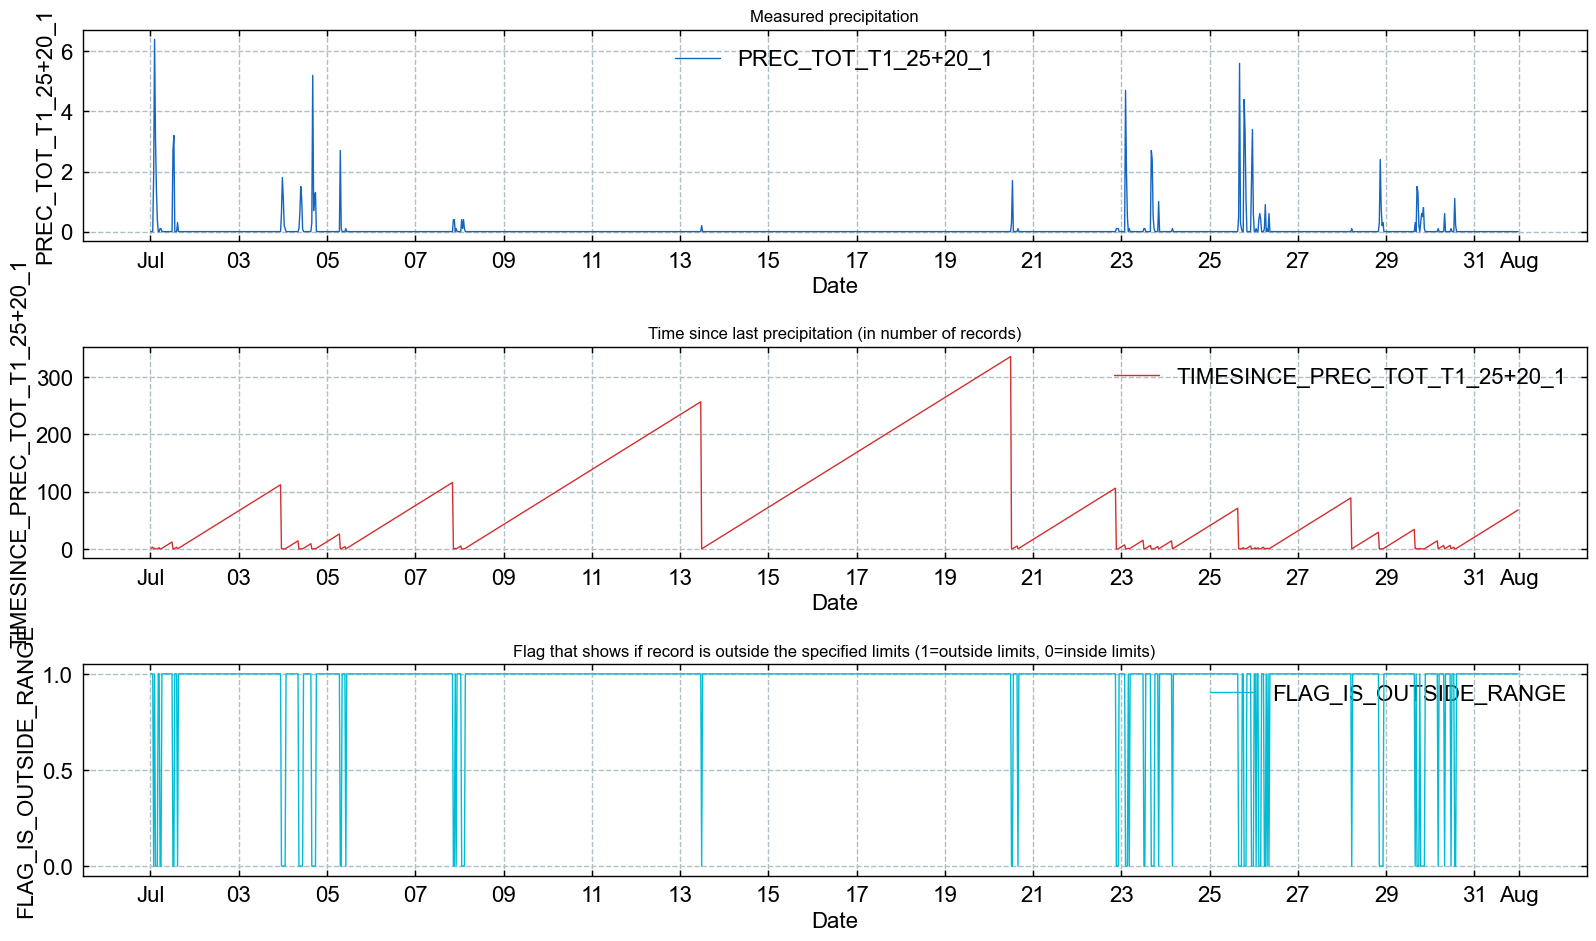

In [10]:
fig = plt.figure(facecolor='white', figsize=(16, 9))
gs = gridspec.GridSpec(3, 1)  # rows, cols
gs.update(wspace=0.3, hspace=0.5, left=0.03, right=0.97, top=0.97, bottom=0.03)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])
TimeSeries(ax=ax1, series=ts_prec_full_results['PREC_TOT_T1_25+20_1']).plot(color='#1565C0')
TimeSeries(ax=ax2, series=ts_prec_full_results['TIMESINCE_PREC_TOT_T1_25+20_1']).plot(color='#D32F2F')
TimeSeries(ax=ax3, series=ts_prec_full_results['FLAG_IS_OUTSIDE_RANGE']).plot(color='#00BCD4')
ax1.set_title("Measured precipitation", color='black')
ax2.set_title("Time since last precipitation (in number of records)", color='black')
ax3.set_title("Flag that shows if record is outside the specified limits (1=outside limits, 0=inside limits)",
              color='black');

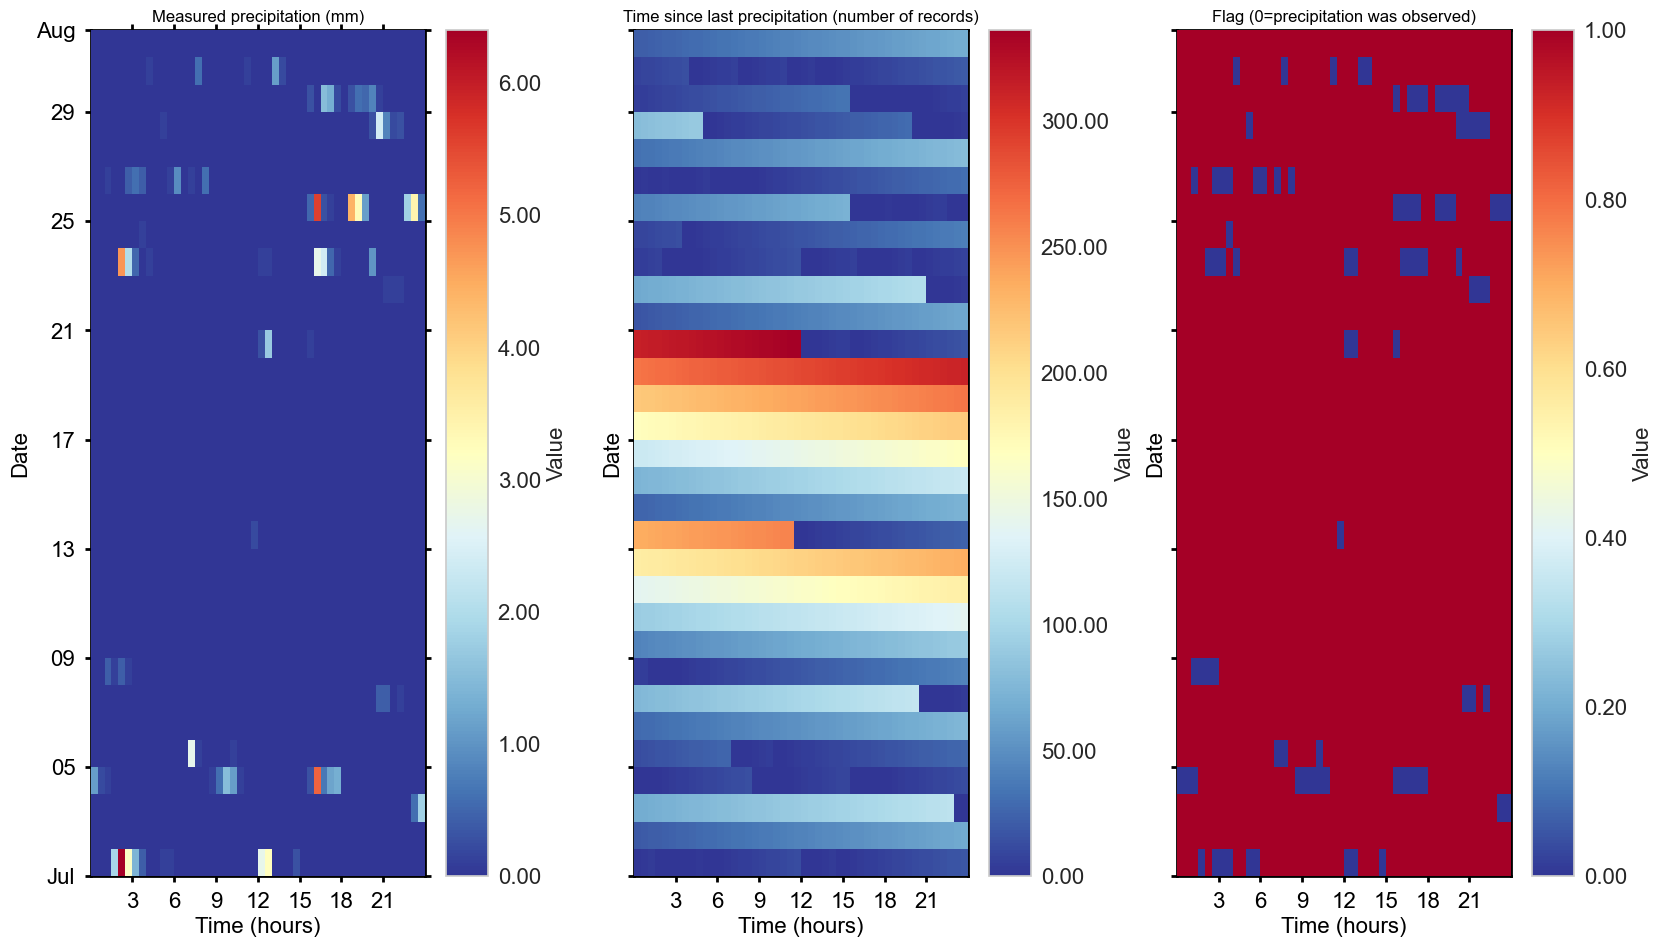

In [11]:
fig = plt.figure(facecolor='white', figsize=(16, 9))
gs = gridspec.GridSpec(1, 3)  # rows, cols
gs.update(wspace=0.3, hspace=0.3, left=0.03, right=0.97, top=0.97, bottom=0.03)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
HeatmapDateTime(ax=ax1, series=ts_prec_full_results['PREC_TOT_T1_25+20_1']).plot()
HeatmapDateTime(ax=ax2, series=ts_prec_full_results['TIMESINCE_PREC_TOT_T1_25+20_1']).plot()
HeatmapDateTime(ax=ax3, series=ts_prec_full_results['FLAG_IS_OUTSIDE_RANGE']).plot()
ax1.set_title("Measured precipitation (mm)", color='black')
ax2.set_title("Time since last precipitation (number of records)", color='black')
ax3.set_title("Flag (0=precipitation was observed)", color='black')
ax2.tick_params(left=True, right=False, top=False, bottom=True,
                labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax3.tick_params(left=True, right=False, top=False, bottom=True,
                labelleft=False, labelright=False, labeltop=False, labelbottom=True)

</br>

# **Example 2: Air temperature**

</br>

## Calculate time since air temperature was less or equal to 0°C
- `upper_lim` is set to `0` and `include_lim` is set to `True` because we are interested in the number of records since the last time temperatures were below 0°C
- `include_lim` is set to `True` to make `upper_lim` inclusive, i.e., to include 0°C
- With these settings the number of records since temperature was <= 0°C are counted

In [12]:
ts_ta = TimeSince(series_ta, upper_lim=0, include_lim=True)
ts_ta.calc()

## Results

The full results comprise the following output variables:
- `Tair_f`: original measured air temperature (°C)
- `UPPER_LIMIT`: upper limit from settings
- `LOWER_LIMIT`: lower limit from settings (not given here, default `None` is used)
- `FLAG_IS_OUTSIDE_RANGE`: shows measured is outside specified limits, used to build cumulative sums in `TIMESINCE_Tair_f`
- `TIMESINCE_Tair_f`: cumulative sums of number of records since last record <= 0°C

In [13]:
ts_ta_full_results = ts_ta.get_full_results()
ts_ta_full_results

,Tair_f,UPPER_LIMIT,LOWER_LIMIT,FLAG_IS_OUTSIDE_RANGE,TIMESINCE_Tair_f
TIMESTAMP_MIDDLE,,,,,
2022-03-01 00:15:00,-7.530,0,-12.273,0,0
2022-03-01 00:45:00,-7.773,0,-12.273,0,0
2022-03-01 01:15:00,-7.693,0,-12.273,0,0
2022-03-01 01:45:00,-8.243,0,-12.273,0,0
2022-03-01 02:15:00,-8.153,0,-12.273,0,0
...,...,...,...,...,...
2022-03-31 21:45:00,-1.057,0,-12.273,0,0
2022-03-31 22:15:00,-1.140,0,-12.273,0,0
2022-03-31 22:45:00,-1.220,0,-12.273,0,0


It is also possible to get the `TIMESINCE_` variable directly, without full results:

In [14]:
ts_ta_series = ts_ta.get_timesince()
ts_ta_series

TIMESTAMP_MIDDLE
2022-03-01 00:15:00    0
2022-03-01 00:45:00    0
2022-03-01 01:15:00    0
2022-03-01 01:45:00    0
2022-03-01 02:15:00    0
                      ..
2022-03-31 21:45:00    0
2022-03-31 22:15:00    0
2022-03-31 22:45:00    0
2022-03-31 23:15:00    0
2022-03-31 23:45:00    0
Freq: 30min, Name: TIMESINCE_Tair_f, Length: 1488, dtype: int64

</br>

## Plot some variables

Text(0.5, 1.0, 'Flag (0=temperature <= 0°C)')

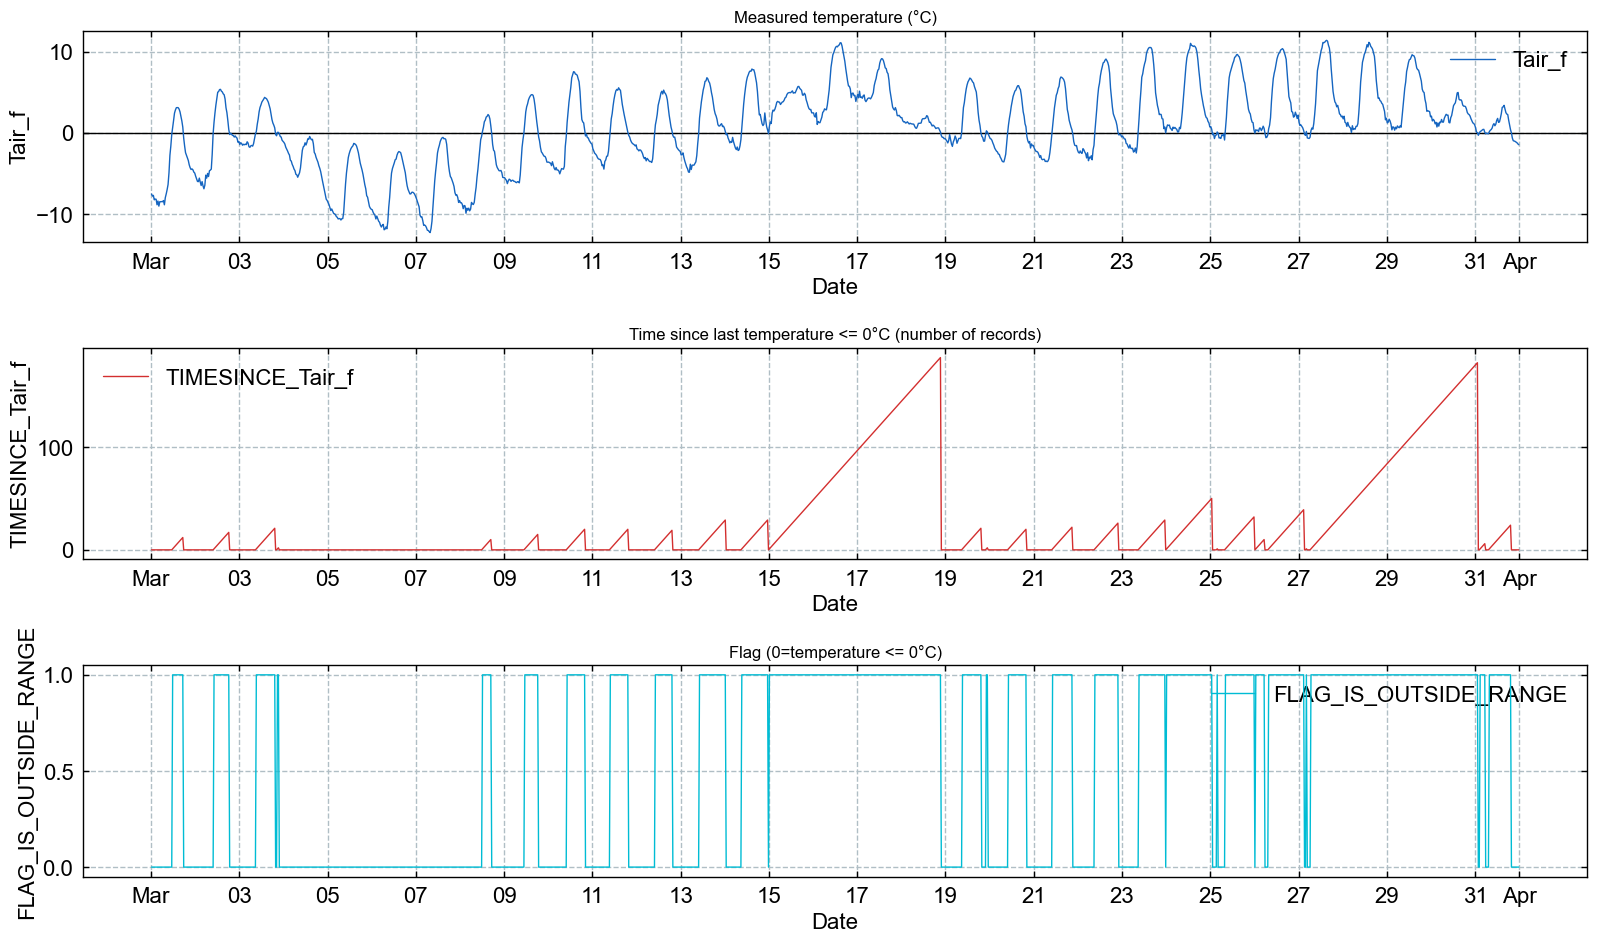

In [15]:
fig = plt.figure(facecolor='white', figsize=(16, 9))
gs = gridspec.GridSpec(3, 1)  # rows, cols
gs.update(wspace=0.3, hspace=0.5, left=0.03, right=0.97, top=0.97, bottom=0.03)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])
TimeSeries(ax=ax1, series=ts_ta_full_results['Tair_f']).plot(color='#1565C0')
TimeSeries(ax=ax2, series=ts_ta_full_results['TIMESINCE_Tair_f']).plot(color='#D32F2F')
TimeSeries(ax=ax3, series=ts_ta_full_results['FLAG_IS_OUTSIDE_RANGE']).plot(color='#00BCD4')
ax1.set_title("Measured temperature (°C)", color='black')
ax2.set_title("Time since last temperature <= 0°C (number of records)", color='black')
ax3.set_title("Flag (0=temperature <= 0°C)", color='black')

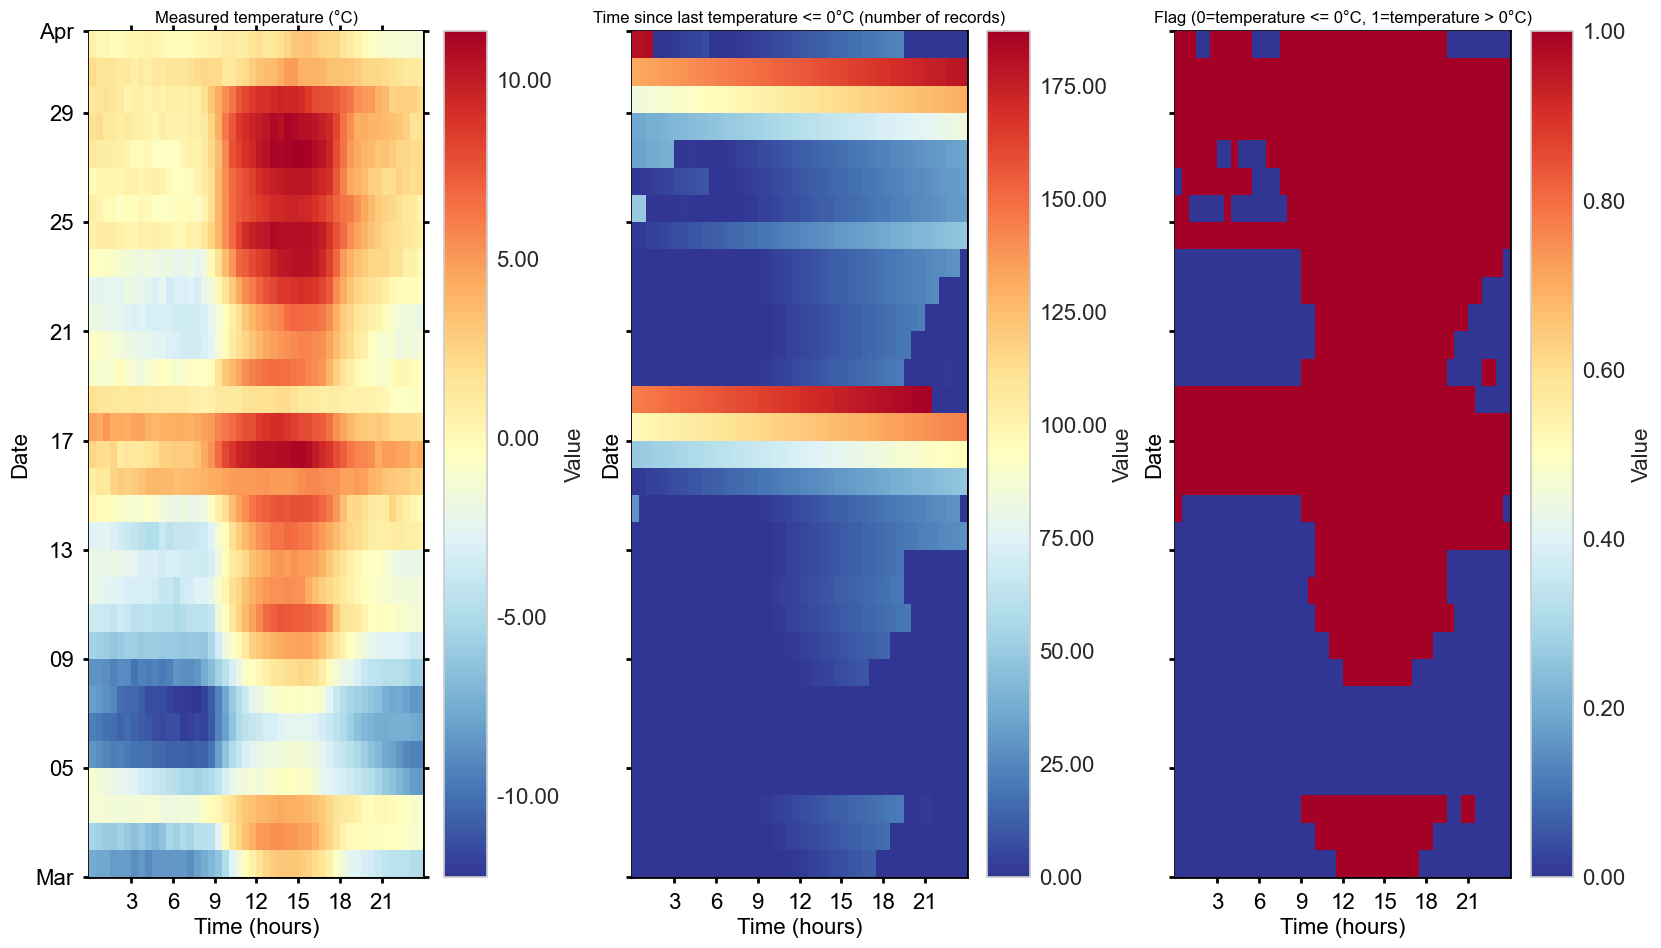

In [16]:
fig = plt.figure(facecolor='white', figsize=(16, 9))
gs = gridspec.GridSpec(1, 3)  # rows, cols
gs.update(wspace=0.3, hspace=0.3, left=0.03, right=0.97, top=0.97, bottom=0.03)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
HeatmapDateTime(ax=ax1, series=ts_ta_full_results['Tair_f']).plot()
HeatmapDateTime(ax=ax2, series=ts_ta_full_results['TIMESINCE_Tair_f']).plot()
HeatmapDateTime(ax=ax3, series=ts_ta_full_results['FLAG_IS_OUTSIDE_RANGE']).plot()
ax1.set_title("Measured temperature (°C)", color='black')
ax2.set_title("Time since last temperature <= 0°C (number of records)", color='black')
ax3.set_title("Flag (0=temperature <= 0°C, 1=temperature > 0°C)", color='black')
ax2.tick_params(left=True, right=False, top=False, bottom=True,
                labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax3.tick_params(left=True, right=False, top=False, bottom=True,
                labelleft=False, labelright=False, labeltop=False, labelbottom=True)

</br>

# **End of notebook**

In [17]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2024-10-24 13:43:09
